# Import lib

In [ ]:
import pandas as pd
import numpy as np
import time

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
import graphviz

from sklearn.naive_bayes import ComplementNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Data Pre-processing

## Load data from Kaggle: [News Headlines Dataset For Sarcasm Detection](https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection)

In [ ]:
!gdown --id 1Yl-13zYCXdbiiLYapqOjRXl1Ud4H_oGv
!gdown --id 1vimUv1D1T8rQ_PrcIwJ1G1INLMxnJsrW

Downloading...
From: https://drive.google.com/uc?id=1Yl-13zYCXdbiiLYapqOjRXl1Ud4H_oGv
To: /content/Sarcasm_Headlines_Dataset.json
100% 5.62M/5.62M [00:00<00:00, 25.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vimUv1D1T8rQ_PrcIwJ1G1INLMxnJsrW
To: /content/Sarcasm_Headlines_Dataset_v2.json
100% 6.06M/6.06M [00:00<00:00, 26.6MB/s]


In [ ]:
data1 = pd.read_json('/content/Sarcasm_Headlines_Dataset.json', lines=True)
data1.head(3)

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1


In [ ]:
data2 = pd.read_json('/content/Sarcasm_Headlines_Dataset_v2.json', lines=True)
data2.head(3)

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...


In [ ]:
df = pd.concat([data1[['headline', 'is_sarcastic']], data2[['headline', 'is_sarcastic']]], ignore_index=True)
df.head(3)

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1


## Dependent Variable Distribution 

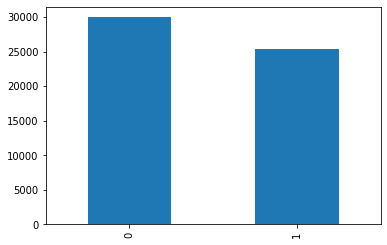

In [ ]:
X = df['headline']
Y = df['is_sarcastic']
Y.value_counts().plot(kind='bar')

## TF-IDF Vectorizer

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,3))
temp = vectorizer.fit_transform(X)
feature_names=vectorizer.get_feature_names_out()
print(feature_names)
print(temp)

['00' '00 probably' '00 probably upstanding' ... 'ünited' 'ünited stätes'
 'ünited stätes toughens']
  (0, 52619)	0.22211237327325273
  (0, 29979)	0.22211237327325273
  (0, 239778)	0.22211237327325273
  (0, 262348)	0.22211237327325273
  (0, 50878)	0.22211237327325273
  (0, 258871)	0.22211237327325273
  (0, 289583)	0.22211237327325273
  (0, 173356)	0.22211237327325273
  (0, 52618)	0.22211237327325273
  (0, 29978)	0.22211237327325273
  (0, 239777)	0.22211237327325273
  (0, 262347)	0.22211237327325273
  (0, 50877)	0.22211237327325273
  (0, 258869)	0.21162853692926822
  (0, 289582)	0.22211237327325273
  (0, 245617)	0.20472301046600064
  (0, 173341)	0.17418273294164632
  (0, 52605)	0.16895149843395368
  (0, 29932)	0.11549770127988843
  (0, 239759)	0.1370815048090938
  (0, 262316)	0.17169200556971387
  (0, 50859)	0.17779259289355073
  (0, 258852)	0.14556652713669466
  (0, 289581)	0.22211237327325273
  (1, 176259)	0.23701913701327795
  :	:
  (55326, 166933)	0.23452087451184891
  (55326, 25260

# Decision Tree Classifier

## Basic

In [ ]:
# Create Model
DTsC = DecisionTreeClassifier()
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,3))

# Make pineline
pipeline = make_pipeline(vectorizer, DTsC, verbose=True)

# K-Fold Cross Valuation with K = 5
t0=time.time()
scores = cross_val_score(pipeline, X, Y, cv= KFold(n_splits=5, shuffle=True, random_state=28))
t1=time.time()

[Pipeline] ... (step 1 of 2) Processing tfidfvectorizer, total=   2.5s
[Pipeline]  (step 2 of 2) Processing decisiontreeclassifier, total= 1.7min
[Pipeline] ... (step 1 of 2) Processing tfidfvectorizer, total=   2.4s
[Pipeline]  (step 2 of 2) Processing decisiontreeclassifier, total= 1.6min
[Pipeline] ... (step 1 of 2) Processing tfidfvectorizer, total=   2.3s
[Pipeline]  (step 2 of 2) Processing decisiontreeclassifier, total= 1.7min
[Pipeline] ... (step 1 of 2) Processing tfidfvectorizer, total=   2.3s
[Pipeline]  (step 2 of 2) Processing decisiontreeclassifier, total= 1.6min
[Pipeline] ... (step 1 of 2) Processing tfidfvectorizer, total=   2.4s
[Pipeline]  (step 2 of 2) Processing decisiontreeclassifier, total= 1.7min


In [ ]:
print("Decision Tree Classifier K-fold accuracy:", scores.mean())
print("Time executed:", t1-t0)

Decision Tree Classifier K-fold accuracy: 0.9289329593649539
Time executed: 507.64650893211365


## GridSearch CV on DecisionTree Classifier

In [ ]:
param_grid = {
    'decisiontreeclassifier__criterion': ('gini', 'entropy'),
    'decisiontreeclassifier__splitter': ('best', 'random'),
    'decisiontreeclassifier__max_depth': [100, 200] + ['None'],
    'decisiontreeclassifier__min_samples_split': [2, 3],
    'decisiontreeclassifier__min_samples_leaf': [1, 2],
    'decisiontreeclassifier__max_features': ['auto', 'sqrt', 'log2', 'None'],
    'decisiontreeclassifier__max_leaf_nodes':  [1000, 2000] + ['None'],
    'decisiontreeclassifier__min_impurity_decrease': [0, 5],
    'decisiontreeclassifier__ccp_alpha': [0, 2]
}

# param_grid = {
#     'decisiontreeclassifier__criterion': ('gini', 'entropy'),
#     'decisiontreeclassifier__splitter': ('best', 'random'),
#     'decisiontreeclassifier__max_depth': list(range(100, 201, 50) + ['None'],
#     'decisiontreeclassifier__min_samples_split': np.arange(0.5, 3.6, 1.5).tolist(),
#     'decisiontreeclassifier__min_samples_leaf': np.arange(0.5, 1.6, 0.5).tolist(),
#     'decisiontreeclassifier__max_features': list(range(1000, 3001, 1000)) + ['auto', 'sqrt', 'log2', 'None'],
#     'decisiontreeclassifier__max_leaf_nodes': list(range(1000, 2001, 500)) + ['None'],
#     'decisiontreeclassifier__min_impurity_decrease': np.arrange(0, 3.6, 1.5).tolist(),
#     'decisiontreeclassifier__ccp_alpha': np.arange(0.5, 1.6, 0.5).tolist(),
# }

# param_grid = {
#     'decisiontreeclassifier__criterion': ('gini', 'entropy'),
#     'decisiontreeclassifier__splitter': ('best', 'random'),
#     'decisiontreeclassifier__max_depth': [100, 150, 200] + ['None'],
#     'decisiontreeclassifier__min_samples_split': [1.5, 2, 3.5],
#     'decisiontreeclassifier__min_samples_leaf': [0.5, 1, 1.5],
#     'decisiontreeclassifier__max_features': [1000, 2000, 3000] + ['auto', 'sqrt', 'log2', 'None'],
#     'decisiontreeclassifier__max_leaf_nodes': [1000, 1500, 2000] + ['None'],
#     'decisiontreeclassifier__min_impurity_decrease': [0, 1.5, 3],
#     'decisiontreeclassifier__ccp_alpha': [0, 0.5, 1]
# }

In [ ]:
DTsC = DecisionTreeClassifier()
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,3))
pipeline = make_pipeline(vectorizer, DTsC)
grid_search_cv = GridSearchCV(pipeline, param_grid=param_grid).fit(X, Y)

In [ ]:
grid_search_cv.best_params_

## Visualize


[Text(176.36785714285713, 195.696, 'man <= 0.028\ngini = 0.497\nsamples = 55328\nvalue = [29970, 25358]'),
 Text(95.65714285714286, 152.208, 'trump <= 0.077\ngini = 0.492\nsamples = 52421\nvalue = [29488, 22933]'),
 Text(47.82857142857143, 108.72, 'nation <= 0.041\ngini = 0.496\nsamples = 49573\nvalue = [26936, 22637]'),
 Text(23.914285714285715, 65.232, 'report <= 0.031\ngini = 0.495\nsamples = 48843\nvalue = [26894, 21949]'),
 Text(11.957142857142857, 21.744, '\n  (...)  \n'),
 Text(35.871428571428574, 21.744, '\n  (...)  \n'),
 Text(71.74285714285715, 65.232, 'nation strictest <= 0.122\ngini = 0.108\nsamples = 730\nvalue = [42, 688]'),
 Text(59.785714285714285, 21.744, '\n  (...)  \n'),
 Text(83.7, 21.744, '\n  (...)  \n'),
 Text(143.4857142857143, 108.72, 'nation <= 0.054\ngini = 0.186\nsamples = 2848\nvalue = [2552, 296]'),
 Text(119.57142857142857, 65.232, 'donald <= 0.104\ngini = 0.178\nsamples = 2827\nvalue = [2548, 279]'),
 Text(107.61428571428571, 21.744, '\n  (...)  \n'),
 T

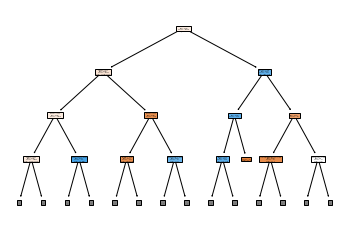

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,3))
temp = vectorizer.fit_transform(X)
feature_names=vectorizer.get_feature_names_out()

DTsC = DecisionTreeClassifier().fit(temp, Y)

plot_tree(DTsC, max_depth=3, feature_names=feature_names, filled=True)

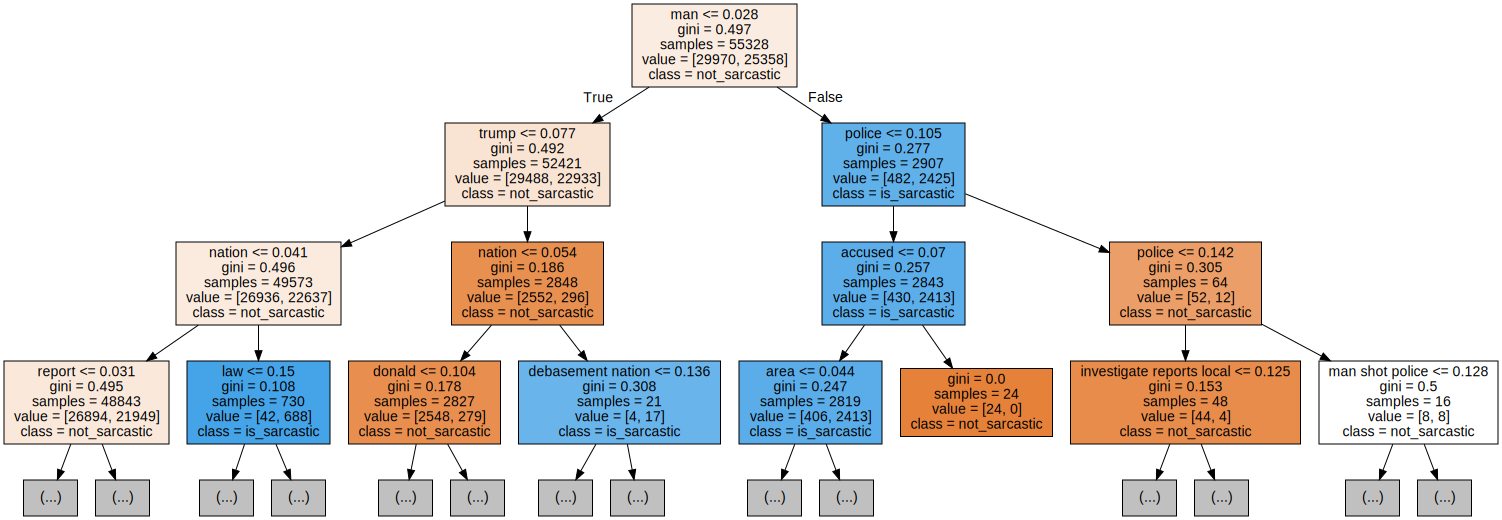

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,3))
temp = vectorizer.fit_transform(X)
feature_names=vectorizer.get_feature_names_out()

DTsC = DecisionTreeClassifier().fit(temp, Y)

src_data = export_graphviz(DTsC, max_depth=3, feature_names=feature_names, class_names=['not_sarcastic', 'is_sarcastic'], filled=True) 
graphviz.Source(src_data)

# Naive Bayes


In [ ]:
# Create Model
nb = ComplementNB()
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,3))

# Make pineline
pipeline = make_pipeline(vectorizer, nb, verbose=True)

# K-Fold Cross Valuation with K = 5
t0=time.time()
scores = cross_val_score(pipeline, X, Y, cv= KFold(n_splits=5, shuffle=True, random_state=28))
t1=time.time()

[Pipeline] ... (step 1 of 2) Processing tfidfvectorizer, total=   2.5s
[Pipeline] ...... (step 2 of 2) Processing complementnb, total=   0.0s
[Pipeline] ... (step 1 of 2) Processing tfidfvectorizer, total=   2.4s
[Pipeline] ...... (step 2 of 2) Processing complementnb, total=   0.0s
[Pipeline] ... (step 1 of 2) Processing tfidfvectorizer, total=   2.4s
[Pipeline] ...... (step 2 of 2) Processing complementnb, total=   0.0s
[Pipeline] ... (step 1 of 2) Processing tfidfvectorizer, total=   2.4s
[Pipeline] ...... (step 2 of 2) Processing complementnb, total=   0.0s
[Pipeline] ... (step 1 of 2) Processing tfidfvectorizer, total=   2.3s
[Pipeline] ...... (step 2 of 2) Processing complementnb, total=   0.0s


In [ ]:
print("Naive Bayes K-fold accuracy:", scores.mean())
print("Time executed:", t1-t0)

Naive Bayes K-fold accuracy: 0.9481094911858186
Time executed: 13.956387996673584


# SVM Classification

In [ ]:
# Create Model
svm = SVC()
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,3))

# Make pineline
pipeline = make_pipeline(vectorizer, svm, verbose=True)

# K-Fold Cross Valuation with K = 5
t0=time.time()
scores = cross_val_score(pipeline, X, Y, cv= KFold(n_splits=5, shuffle=True, random_state=28))
t1=time.time()

[Pipeline] ... (step 1 of 2) Processing tfidfvectorizer, total=   2.6s
[Pipeline] ............... (step 2 of 2) Processing svc, total=11.9min
[Pipeline] ... (step 1 of 2) Processing tfidfvectorizer, total=   2.5s
[Pipeline] ............... (step 2 of 2) Processing svc, total=12.5min
[Pipeline] ... (step 1 of 2) Processing tfidfvectorizer, total=   2.5s
[Pipeline] ............... (step 2 of 2) Processing svc, total=11.9min
[Pipeline] ... (step 1 of 2) Processing tfidfvectorizer, total=   2.5s
[Pipeline] ............... (step 2 of 2) Processing svc, total=12.6min
[Pipeline] ... (step 1 of 2) Processing tfidfvectorizer, total=   2.5s
[Pipeline] ............... (step 2 of 2) Processing svc, total=12.1min


In [ ]:
print("SVM Classification K-fold accuracy:", scores.mean())
print("Time executed:", t1-t0)

SVM Classification K-fold accuracy: 0.9535497853776164
Time executed: 3948.7406299114227


# Logistic Regression


In [ ]:
# Create Model
logreg = LogisticRegression()
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,3))

# Make pineline
pipeline = make_pipeline(vectorizer, logreg, verbose=True)

# K-Fold Cross Valuation with K = 5
t0=time.time()
scores = cross_val_score(pipeline, X, Y, cv= KFold(n_splits=5, shuffle=True, random_state=28))
t1=time.time()

[Pipeline] ... (step 1 of 2) Processing tfidfvectorizer, total=   2.5s
[Pipeline]  (step 2 of 2) Processing logisticregression, total=   8.6s
[Pipeline] ... (step 1 of 2) Processing tfidfvectorizer, total=   2.5s
[Pipeline]  (step 2 of 2) Processing logisticregression, total=   6.1s
[Pipeline] ... (step 1 of 2) Processing tfidfvectorizer, total=   2.4s
[Pipeline]  (step 2 of 2) Processing logisticregression, total=   4.3s
[Pipeline] ... (step 1 of 2) Processing tfidfvectorizer, total=   2.5s
[Pipeline]  (step 2 of 2) Processing logisticregression, total=   6.8s
[Pipeline] ... (step 1 of 2) Processing tfidfvectorizer, total=   2.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[Pipeline]  (step 2 of 2) Processing logisticregression, total=   8.3s


In [ ]:
print("Logistic Regression K-fold accuracy:", scores.mean())
print("Time executed:", t1-t0)

Logistic Regression K-fold accuracy: 0.9101901036781406
Time executed: 48.52994155883789
